In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Data Engineering

In [ ]:
df = pd.read_csv('/content/train.csv')

Extracting the Weekdays and hours from the datetime column

In [ ]:
df['datetime']=df['datetime'].apply(pd.to_datetime)
df['hour']=df['datetime'].apply(lambda x : x.hour)
df['datetime']=df['datetime'].dt.day_of_week

In [ ]:
df.dtypes

datetime        int64
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
hour            int64
dtype: object

In [ ]:
df.rename(columns = {'datetime':'weekday'}, inplace = True)
df.head()

,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,5,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,5,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,5,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,5,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,5,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [ ]:
df.describe()

,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,3.013963,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,2.004585,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,5.000000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,6.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


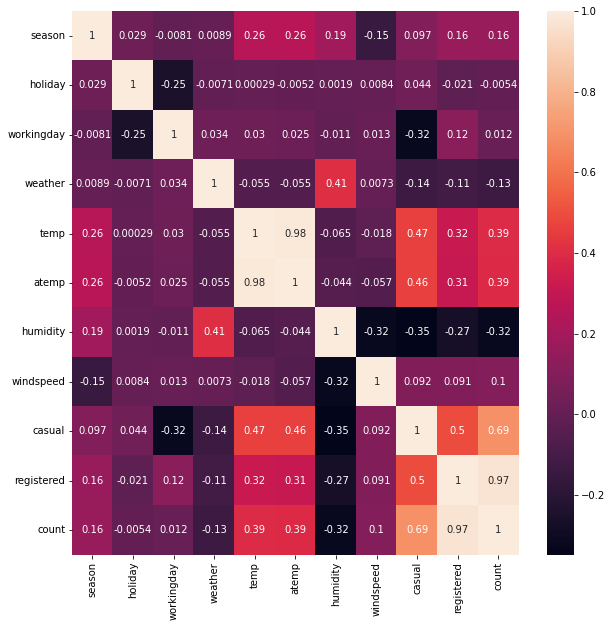

In [ ]:
corr = df.drop(['weekday','hour'],axis=1).corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr , annot = True, ax=ax)

Since the correlation between dataset and some features like *windspeed*,  **atemp** (correlation of atmep with temp is almost perfect) is fewer than enough we can drop these columns to make our process faster


In [ ]:
df = df.drop (['atemp','windspeed'],axis=1)
df

,weekday,season,holiday,workingday,weather,temp,humidity,casual,registered,count,hour
0,5,1,0,0,1,9.84,81,3,13,16,0
1,5,1,0,0,1,9.02,80,8,32,40,1
2,5,1,0,0,1,9.02,80,5,27,32,2
3,5,1,0,0,1,9.84,75,3,10,13,3
4,5,1,0,0,1,9.84,75,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,2,4,0,1,1,15.58,50,7,329,336,19
10882,2,4,0,1,1,14.76,57,10,231,241,20
10883,2,4,0,1,1,13.94,61,4,164,168,21
10884,2,4,0,1,1,13.94,61,12,117,129,22


In [ ]:
df.dtypes

weekday         int64
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
casual          int64
registered      int64
count           int64
hour            int64
dtype: object

If we compare data info in this cell with the other one above we can see a dramatic decrease in memory usage from 1020 to 702 (30%) altough this train dataset is not really heavy but even in this situation it brings better results

In [ ]:
cols = ['weather','season','holiday','workingday','weekday','hour']
for col in cols:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   weekday     10886 non-null  category
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  hour        10886 non-null  category
dtypes: category(6), float64(1), int64(4)
memory usage: 490.9 KB


# EDA

The effect the temperature has on the number of bikes rented on a specific day

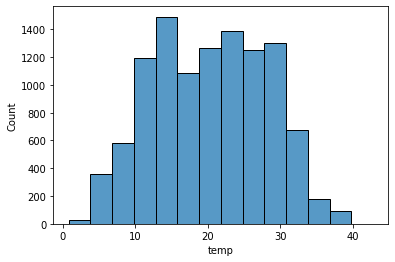

In [ ]:
sns.histplot(data=df, x="temp",binwidth=3)


In [ ]:
workCountgb = df.groupby('workingday').sum()
workCount = workCountgb.loc[1]['count']
workCount

1430604.0

In [ ]:
weekend = workCountgb.loc[0]['count']
holidaygb = df.groupby('holiday').sum()
holidayCount = holidaygb.loc[1]['count']

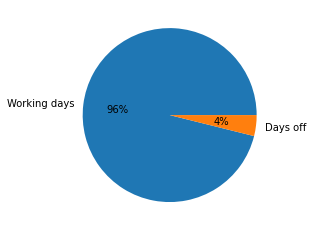

In [ ]:
data = [workCount,holidayCount]
labels = ['Working days', 'Days off']
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

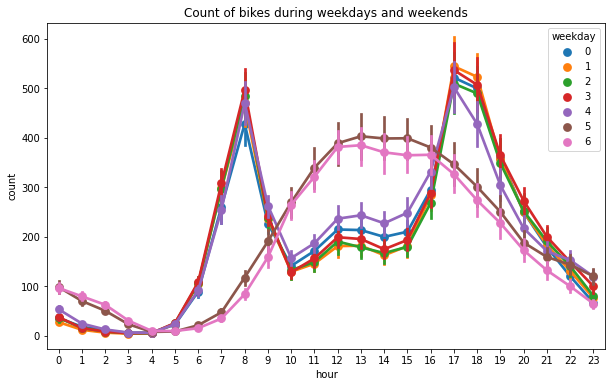

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

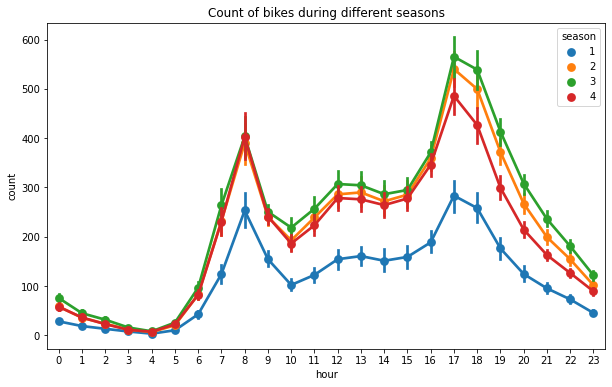

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

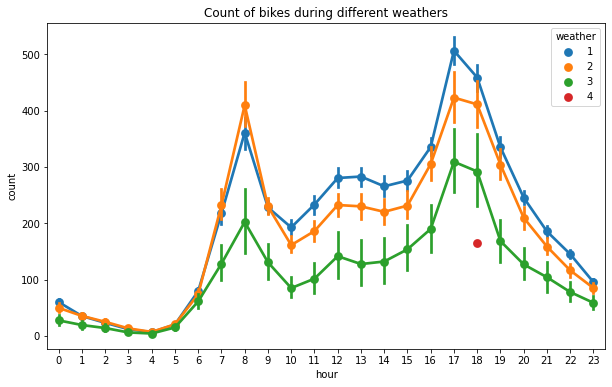

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different hours')]

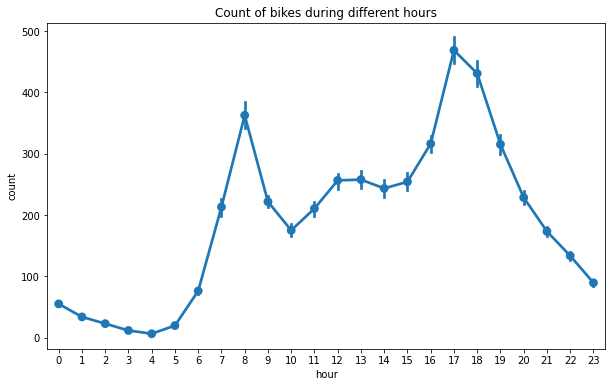

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=df, x='hour', y='count', ax=ax)
ax.set(title='Count of bikes during different hours')

[Text(0.5, 1.0, 'Relation between temperature and users')]

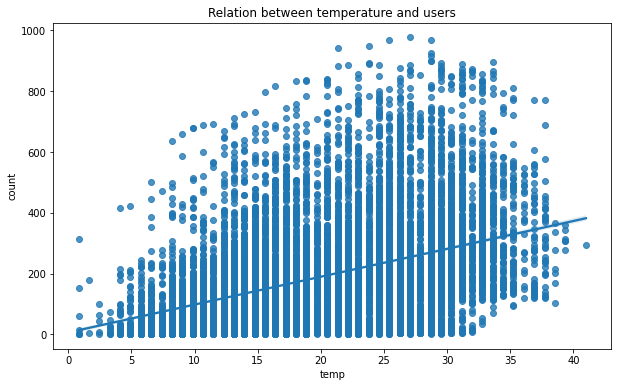

In [ ]:
fig,ax1 = plt.subplots( figsize=(10,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")

[Text(0.5, 1.0, 'Relation between humidity and users')]

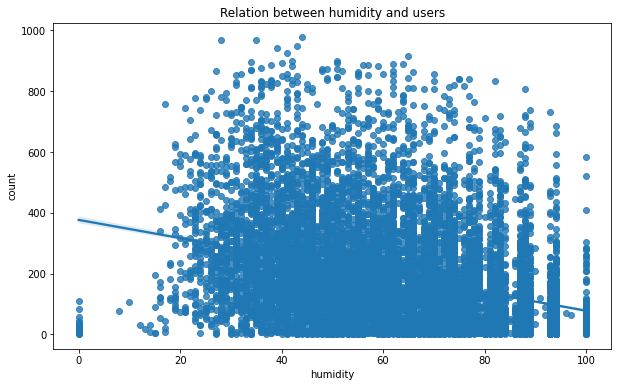

In [ ]:
fig,ax2 = plt.subplots( figsize=(10,6))
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of the number of bikes rented')]

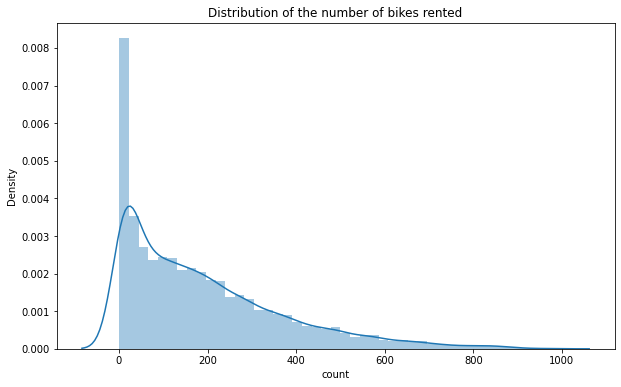

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(df['count'])
ax.set(title='Distribution of the number of bikes rented')


# One hot encoding

Using one hot encoding to be able to train the model

In [ ]:
df

,weekday,season,holiday,workingday,weather,temp,humidity,casual,registered,count,hour
0,5,1,0,0,1,9.84,81,3,13,16,0
1,5,1,0,0,1,9.02,80,8,32,40,1
2,5,1,0,0,1,9.02,80,5,27,32,2
3,5,1,0,0,1,9.84,75,3,10,13,3
4,5,1,0,0,1,9.84,75,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,2,4,0,1,1,15.58,50,7,329,336,19
10882,2,4,0,1,1,14.76,57,10,231,241,20
10883,2,4,0,1,1,13.94,61,4,164,168,21
10884,2,4,0,1,1,13.94,61,12,117,129,22


In [ ]:
df_one = pd.get_dummies(df)

In [ ]:
df_one

,temp,humidity,casual,registered,count,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,3,13,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,80,8,32,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,80,5,27,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,75,3,10,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,75,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50,7,329,336,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,57,10,231,241,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,61,4,164,168,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,61,12,117,129,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

We'll scale the data using a min max scaler as well as apply a log function to the count as the distribution is right skewed

In [ ]:
scaler = MinMaxScaler()
df_one[['temp','humidity']]=scaler.fit_transform(df_one[['temp','humidity']])
df_one['count'] = np.log1p(df_one['count']) 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of the number of bikes rented')]

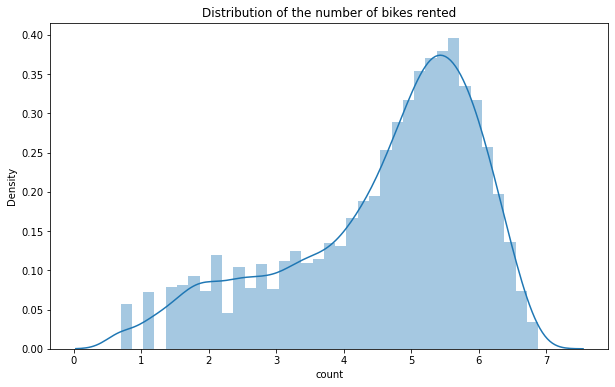

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(df_one['count'])
ax.set(title='Distribution of the number of bikes rented')

# Checking which model to use

We'll loop through most of the models and check the scores to determine which one to use.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [ ]:
from sklearn import model_selection
modelScore = {}
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle = True)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    modelScore[model]=abs(cv_score)

In [ ]:
for model in models:
    train(model)
print('The model with the lowest score is ', min(modelScore, key=modelScore.get))

The model with the lowest score is  RandomForestRegressor()


# Model Training 

As seen from the results above, the Extra Trees Regressor got the lowest score, hence we'll be using it as out model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_one.drop(columns=[ 'casual', 'registered', 'count'], axis=1)
y = df_one['count']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)

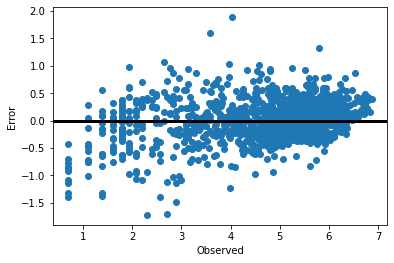

In [ ]:
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.3925563324254991
